In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines import KaplanMeierFitter 
from lifelines.statistics import logrank_test, pairwise_logrank_test, multivariate_logrank_test

In [2]:
sns.set(font="Arial", font_scale=1.25)
sns.set_style('whitegrid')

In [3]:
for biomarker in ['PTAU', 'ALL']:
    print(biomarker)
    survival_file = f'data/ADNI/survival_plots/{biomarker}_survival.csv'
    survival_data = pd.read_csv(survival_file, index_col='RID')
    survival_data.sort_values(by='scenario', inplace=True)


    cph1 = CoxPHFitter()
    cph2 = CoxPHFitter()
    cph3 = CoxPHFitter()

    data01 = survival_data.loc[(survival_data['scenario'] == 0) | (survival_data['scenario'] == 1)]
    data02 = survival_data.loc[(survival_data['scenario'] == 0) | (survival_data['scenario'] == 2)]
    data12 = survival_data.loc[(survival_data['scenario'] == 1) | (survival_data['scenario'] == 2)]
    
    data02['scenario'].replace({2:1}, inplace=True)
    data12['scenario'].replace({1:0, 2:1}, inplace=True)

    c0_vs_c1 = cph1.fit(data01,
                        duration_col='followup',
                        event_col='event',
                        formula="sex+age+education+scenario")

    c0_vs_c2 = cph2.fit(data02,
                        duration_col='followup',
                        event_col='event',
                        formula="sex+age+education+scenario")

    c1_vs_c2 = cph3.fit(data12,
                        duration_col='followup',
                        event_col='event',
                        formula="sex+age+education+scenario")


    print(c0_vs_c1.print_summary(columns=["exp(coef)", "exp(coef) lower 95%", "exp(coef) upper 95%", "p"]))
    print(c0_vs_c2.print_summary(columns=["exp(coef)", "exp(coef) lower 95%", "exp(coef) upper 95%", "p"]))
    print(c1_vs_c2.print_summary(columns=["exp(coef)", "exp(coef) lower 95%", "exp(coef) upper 95%", "p"]))
    print()
    print()

for biomarker in ['ABETA', 'TAU']:
    print(biomarker)
    survival_file = f'data/ADNI/survival_plots/{biomarker}_survival.csv'
    survival_data = pd.read_csv(survival_file, index_col='RID')
    survival_data.sort_values(by='scenario', inplace=True)

    cph = CoxPHFitter()

    c0_vs_c1 = cph.fit(survival_data,
                        duration_col='followup',
                        event_col='event',
                        formula="sex+age+education+scenario")


    print(c0_vs_c1.print_summary(columns=["exp(coef)", "exp(coef) lower 95%", "exp(coef) upper 95%", "p"]))
    print()
    print()

PTAU


/tmp/ipykernel_35688/3201047282.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data02['scenario'].replace({2:1}, inplace=True)
/tmp/ipykernel_35688/3201047282.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data12['scenario'].replace({1:0, 2:1}, inplace=True)
/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/printer.py:74: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  columns = summary_df.columns & self.columns
/home/laura/anaconda3/envs/

<lifelines.CoxPHFitter: fitted with 385 total observations, 292 right-censored observations>
             duration col = 'followup'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 385
number of events observed = 93
   partial log-likelihood = -491.16
         time fit was run = 2022-11-22 09:52:18 UTC

---
           exp(coef)  exp(coef) lower 95%  exp(coef) upper 95%      p
covariate                                                            
age             1.02                 0.99                 1.05   0.27
education       0.95                 0.88                 1.02   0.17
scenario        4.26                 2.78                 6.53 <0.005
sex             0.58                 0.37                 0.90   0.02
---
Concordance = 0.73
Partial AIC = 990.31
log-likelihood ratio test = 55.64 on 4 df
-log2(p) of ll-ratio test = 35.29

None


/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/printer.py:74: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  columns = summary_df.columns & self.columns
/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/printer.py:61: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  columns = summary_df.columns & self.columns
/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.styl

<lifelines.CoxPHFitter: fitted with 283 total observations, 230 right-censored observations>
             duration col = 'followup'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 283
number of events observed = 53
   partial log-likelihood = -260.27
         time fit was run = 2022-11-22 09:52:18 UTC

---
           exp(coef)  exp(coef) lower 95%  exp(coef) upper 95%      p
covariate                                                            
age             1.00                 0.95                 1.04   0.87
education       0.98                 0.89                 1.09   0.75
scenario        7.10                 4.00                12.61 <0.005
sex             0.62                 0.35                 1.11   0.11
---
Concordance = 0.72
Partial AIC = 528.55
log-likelihood ratio test = 36.81 on 4 df
-log2(p) of ll-ratio test = 22.27

None


/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/printer.py:74: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  columns = summary_df.columns & self.columns
/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/printer.py:61: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  columns = summary_df.columns & self.columns
/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.styl

<lifelines.CoxPHFitter: fitted with 170 total observations, 92 right-censored observations>
             duration col = 'followup'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 170
number of events observed = 78
   partial log-likelihood = -362.04
         time fit was run = 2022-11-22 09:52:18 UTC

---
           exp(coef)  exp(coef) lower 95%  exp(coef) upper 95%    p
covariate                                                          
age             0.98                 0.95                 1.02 0.30
education       0.99                 0.91                 1.07 0.71
scenario        1.51                 0.90                 2.55 0.12
sex             0.84                 0.53                 1.33 0.45
---
Concordance = 0.56
Partial AIC = 732.08
log-likelihood ratio test = 4.14 on 4 df
-log2(p) of ll-ratio test = 1.37

None


ALL


/tmp/ipykernel_35688/3201047282.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data02['scenario'].replace({2:1}, inplace=True)
/tmp/ipykernel_35688/3201047282.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data12['scenario'].replace({1:0, 2:1}, inplace=True)
/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/printer.py:74: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  columns = summary_df.columns & self.columns
/home/laura/anaconda3/envs/

<lifelines.CoxPHFitter: fitted with 336 total observations, 273 right-censored observations>
             duration col = 'followup'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 336
number of events observed = 63
   partial log-likelihood = -326.61
         time fit was run = 2022-11-22 09:52:18 UTC

---
           exp(coef)  exp(coef) lower 95%  exp(coef) upper 95%      p
covariate                                                            
age             1.06                 1.02                 1.11   0.01
education       0.94                 0.86                 1.03   0.20
scenario        2.76                 1.61                 4.73 <0.005
sex             0.54                 0.31                 0.94   0.03
---
Concordance = 0.70
Partial AIC = 661.22
log-likelihood ratio test = 30.86 on 4 df
-log2(p) of ll-ratio test = 18.22

None


/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/printer.py:74: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  columns = summary_df.columns & self.columns
/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/printer.py:61: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  columns = summary_df.columns & self.columns
/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.styl

<lifelines.CoxPHFitter: fitted with 258 total observations, 190 right-censored observations>
             duration col = 'followup'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 258
number of events observed = 68
   partial log-likelihood = -311.39
         time fit was run = 2022-11-22 09:52:18 UTC

---
           exp(coef)  exp(coef) lower 95%  exp(coef) upper 95%      p
covariate                                                            
age             0.97                 0.93                 1.00   0.06
education       1.01                 0.93                 1.10   0.73
scenario       11.51                 6.59                20.11 <0.005
sex             0.97                 0.59                 1.61   0.92
---
Concordance = 0.78
Partial AIC = 630.78
log-likelihood ratio test = 85.08 on 4 df
-log2(p) of ll-ratio test = 55.93

None


/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/printer.py:74: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  columns = summary_df.columns & self.columns
/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/printer.py:61: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  columns = summary_df.columns & self.columns
/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.styl

<lifelines.CoxPHFitter: fitted with 244 total observations, 151 right-censored observations>
             duration col = 'followup'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 244
number of events observed = 93
   partial log-likelihood = -451.16
         time fit was run = 2022-11-22 09:52:18 UTC

---
           exp(coef)  exp(coef) lower 95%  exp(coef) upper 95%      p
covariate                                                            
age             0.97                 0.94                 1.00   0.07
education       0.98                 0.91                 1.05   0.54
scenario        3.64                 2.38                 5.57 <0.005
sex             0.71                 0.46                 1.10   0.13
---
Concordance = 0.67
Partial AIC = 910.32
log-likelihood ratio test = 38.70 on 4 df
-log2(p) of ll-ratio test = 23.57

None


ABETA


/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/printer.py:74: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  columns = summary_df.columns & self.columns
/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/printer.py:61: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  columns = summary_df.columns & self.columns
/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.styl

<lifelines.CoxPHFitter: fitted with 419 total observations, 307 right-censored observations>
             duration col = 'followup'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 419
number of events observed = 112
   partial log-likelihood = -600.17
         time fit was run = 2022-11-22 09:52:19 UTC

---
           exp(coef)  exp(coef) lower 95%  exp(coef) upper 95%      p
covariate                                                            
age             0.99                 0.96                 1.03   0.73
education       0.97                 0.91                 1.04   0.42
scenario        5.66                 3.47                 9.24 <0.005
sex             0.81                 0.55                 1.20   0.30
---
Concordance = 0.71
Partial AIC = 1208.34
log-likelihood ratio test = 67.78 on 4 df
-log2(p) of ll-ratio test = 43.77

None


TAU


/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/printer.py:74: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  columns = summary_df.columns & self.columns
/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/printer.py:61: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  columns = summary_df.columns & self.columns
/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.styl

<lifelines.CoxPHFitter: fitted with 419 total observations, 307 right-censored observations>
             duration col = 'followup'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 419
number of events observed = 112
   partial log-likelihood = -611.06
         time fit was run = 2022-11-22 09:52:19 UTC

---
           exp(coef)  exp(coef) lower 95%  exp(coef) upper 95%      p
covariate                                                            
age             1.00                 0.97                 1.03   0.84
education       0.96                 0.90                 1.03   0.26
scenario        3.57                 2.45                 5.20 <0.005
sex             0.66                 0.45                 0.98   0.04
---
Concordance = 0.69
Partial AIC = 1230.12
log-likelihood ratio test = 45.99 on 4 df
-log2(p) of ll-ratio test = 28.59

None




/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 419 total observations, 307 right-censored observations>
             duration col = 'followup'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 419
number of events observed = 112
   partial log-likelihood = -591.54
         time fit was run = 2022-12-10 18:17:36 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.00       1.00       0.02            -0.03             0.03                 0.97                 1.03
education  -0.02       0.98       0.03            -0.08             0.05                 0.92                 1.05
scenario    1.86       6.44       0.23             1.41             2.31                 4.10                10.12
sex        -0.07       0.93       0.20            -0.47             0.33                 0.63                 1.38

            cmp to     z      p   -log2(p)
covariate                                 
age           0.00  0.21   0.83       0.26
education     0.00 -0.44   0.66       0.61
scenario      0.00  8.07 <0.005      50.31
sex           0.00 -0.35   0.73       0.46
---
Concordance = 0.73
Partial AIC = 1191.08
log-likelihood ratio test = 85.04 on 4 df
-log2(p) of ll-ratio test = 55.90

None




/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 419 total observations, 307 right-censored observations>
             duration col = 'followup'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 419
number of events observed = 112
   partial log-likelihood = -600.44
         time fit was run = 2022-12-10 18:17:36 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age        -0.00       1.00       0.02            -0.03             0.03                 0.97                 1.03
education  -0.04       0.96       0.03            -0.10             0.03                 0.90                 1.03
scenario    1.56       4.76       0.21             1.16             1.96                 3.18                 7.13
sex        -0.37       0.69       0.20            -0.76             0.02                 0.47                 1.02

            cmp to     z      p   -log2(p)
covariate                                 
age           0.00 -0.22   0.82       0.28
education     0.00 -1.06   0.29       1.80
scenario      0.00  7.57 <0.005      44.63
sex           0.00 -1.86   0.06       3.99
---
Concordance = 0.72
Partial AIC = 1208.89
log-likelihood ratio test = 67.23 on 4 df
-log2(p) of ll-ratio test = 43.38

None




/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 419 total observations, 307 right-censored observations>
             duration col = 'followup'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 419
number of events observed = 112
   partial log-likelihood = -608.58
         time fit was run = 2022-12-10 18:17:36 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age        -0.00       1.00       0.02            -0.03             0.03                 0.97                 1.03
education  -0.04       0.96       0.03            -0.10             0.03                 0.90                 1.03
scenario    1.33       3.79       0.20             0.94             1.72                 2.57                 5.59
sex        -0.41       0.66       0.20            -0.80            -0.02                 0.45                 0.98

            cmp to     z      p   -log2(p)
covariate                                 
age           0.00 -0.25   0.80       0.32
education     0.00 -1.13   0.26       1.96
scenario      0.00  6.73 <0.005      35.74
sex           0.00 -2.06   0.04       4.65
---
Concordance = 0.70
Partial AIC = 1225.16
log-likelihood ratio test = 50.95 on 4 df
-log2(p) of ll-ratio test = 32.03

None




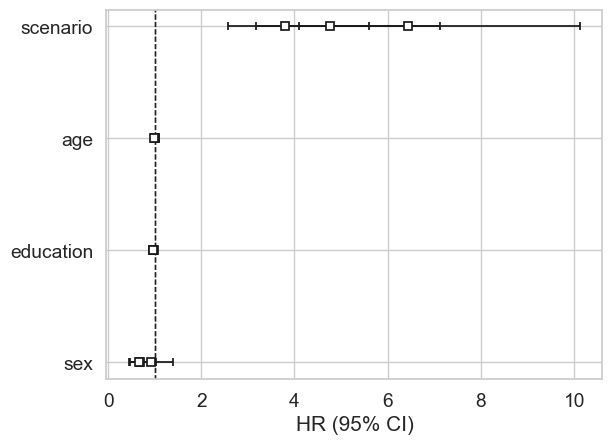

In [3]:
for biomarker in ['A', 'T', 'N']:
    survival_file = f'data/ADNI/survival_plots/{biomarker}_survival_ATN.csv'
    survival_data = pd.read_csv(survival_file, index_col='RID')
    survival_data.sort_values(by='scenario', inplace=True)
    survival_data.replace({'A+':1, 'T+':1, 'N+':1, 'A-':0, 'T-':0, 'N-':0}, inplace=True)

    cph = CoxPHFitter()

    pos_vs_neg = cph.fit(survival_data,
                         duration_col='followup',
                         event_col='event',
                         formula="sex+age+education+scenario")

    print(pos_vs_neg.print_summary())
    print()
    print()

In [28]:
survival_file = f'data/ADNI/survival_plots/ATN_survival_ATN.csv'
survival_data = pd.read_csv(survival_file, index_col='RID')
survival_data.sort_values(by='scenario', inplace=True)

import itertools

categories = list(set(survival_data['scenario'].values))
combinations = list(itertools.combinations(categories, 2))
combinations

for pair in combinations:

   print(pair)

   p1 = pair[0]
   p2 = pair[1]


   tmp_data = survival_data.loc[(survival_data['scenario'] == p1) | (survival_data['scenario'] == p2)]
   tmp_df = tmp_data.replace({p1:0, p2:1})

   print('Total:', tmp_df.shape[0])

   print(tmp_df.loc[tmp_df['event'] == True]['scenario'].value_counts())

   if (tmp_df.loc[tmp_df['event'] == True]).empty:
      pass
   else:
      cph = CoxPHFitter()

      pos_vs_neg = cph.fit(tmp_df,
                           duration_col='followup',
                           event_col='event',
                           formula="sex+age+education+scenario")

      print(pos_vs_neg.print_summary())
      print()
      print()

('A-T+N-', 'A-T+N+')
Total: 67
1    11
Name: scenario, dtype: int64


/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/__init__.py:1123: ConvergenceWarning: Column scenario have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['event'].astype(bool)
>>> print(df.loc[events, 'scenario'].var())
>>> print(df.loc[~events, 'scenario'].var())

A very low variance means that the column scenario completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/fitters/coxph_fitter.py:1603: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.265. This may imply non-unique solutions to the maximum likelihood. 

<lifelines.CoxPHFitter: fitted with 67 total observations, 56 right-censored observations>
             duration col = 'followup'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 67
number of events observed = 11
   partial log-likelihood = -40.08
         time fit was run = 2022-12-12 11:43:52 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.04       1.04       0.05            -0.05             0.13                 0.95                 1.14
education  -0.06       0.95       0.11            -0.27             0.16                 0.76                 1.17
scenario   16.14   1.02e+07    2856.20         -5581.92          5614.20                 0.00                  inf
sex        -0.07       0.93       0.68            -1.40             1.25                 0.25                 3.50

            cmp to     z    p   -log2(p)
covariate                               
age           0.00  0.87 0.38       1.39
education     0.00 -0.51 0.61       0.71
scenario      0.00  0.01 1.00       0.01
sex           0.00 -0.11 0.91       0.13
---
Concordance = 0.62
Partial AIC = 88.16
log-likelihood ratio test = 3.37 on 4 df
-log2(p) of ll-ratio test = 1.01

None


('A-T+N-', 'A-T-N-')
Total: 166
1    14
Name: scenario, dtype: int64


/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/__init__.py:1123: ConvergenceWarning: Column scenario have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['event'].astype(bool)
>>> print(df.loc[events, 'scenario'].var())
>>> print(df.loc[~events, 'scenario'].var())

A very low variance means that the column scenario completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/fitters/coxph_fitter.py:1603: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.171. This may imply non-unique solutions to the maximum likelihood. 

<lifelines.CoxPHFitter: fitted with 166 total observations, 152 right-censored observations>
             duration col = 'followup'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 166
number of events observed = 14
   partial log-likelihood = -62.48
         time fit was run = 2022-12-12 11:43:52 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.02       1.02       0.04            -0.07             0.10                 0.93                 1.11
education   0.02       1.02       0.10            -0.18             0.22                 0.84                 1.24
scenario   14.91   3.00e+06    2397.80         -4684.69          4714.52                 0.00                  inf
sex        -0.86       0.42       0.61            -2.05             0.34                 0.13                 1.40

            cmp to     z    p   -log2(p)
covariate                               
age           0.00  0.36 0.72       0.48
education     0.00  0.20 0.84       0.25
scenario      0.00  0.01 1.00       0.01
sex           0.00 -1.41 0.16       2.65
---
Concordance = 0.58
Partial AIC = 132.95
log-likelihood ratio test = 3.88 on 4 df
-log2(p) of ll-ratio test = 1.25

None


('A-T+N-', 'A+T+N-')
Total: 15
1    7
Name: scenario, dtype: int64


/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/__init__.py:1123: ConvergenceWarning: Column scenario have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['event'].astype(bool)
>>> print(df.loc[events, 'scenario'].var())
>>> print(df.loc[~events, 'scenario'].var())

A very low variance means that the column scenario completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/fitters/coxph_fitter.py:1603: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.488. This may imply non-unique solutions to the maximum likelihood. 

<lifelines.CoxPHFitter: fitted with 15 total observations, 8 right-censored observations>
             duration col = 'followup'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 15
number of events observed = 7
   partial log-likelihood = -9.15
         time fit was run = 2022-12-12 11:43:52 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.09       1.09       0.06            -0.02             0.20                 0.98                 1.23
education  -0.71       0.49       0.42            -1.52             0.11                 0.22                 1.11
scenario   19.88   4.32e+08    2857.42         -5580.57          5620.33                 0.00                  inf
sex        -1.44       0.24       1.10            -3.59             0.71                 0.03                 2.04

            cmp to     z    p   -log2(p)
covariate                               
age           0.00  1.55 0.12       3.03
education     0.00 -1.70 0.09       3.48
scenario      0.00  0.01 0.99       0.01
sex           0.00 -1.31 0.19       2.39
---
Concordance = 0.88
Partial AIC = 26.29
log-likelihood ratio test = 13.89 on 4 df
-log2(p) of ll-ratio test = 7.03

None


('A-T+N-', 'A+T-N-')
Total: 89
1    21
Name: scenario, dtype: int64


/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/__init__.py:1123: ConvergenceWarning: Column scenario have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['event'].astype(bool)
>>> print(df.loc[events, 'scenario'].var())
>>> print(df.loc[~events, 'scenario'].var())

A very low variance means that the column scenario completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/fitters/coxph_fitter.py:1603: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.232. This may imply non-unique solutions to the maximum likelihood. 

<lifelines.CoxPHFitter: fitted with 89 total observations, 68 right-censored observations>
             duration col = 'followup'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 89
number of events observed = 21
   partial log-likelihood = -80.82
         time fit was run = 2022-12-12 11:43:52 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.08       1.09       0.04             0.01             0.16                 1.01                 1.17
education  -0.12       0.89       0.07            -0.26             0.02                 0.77                 1.02
scenario   16.11   9.89e+06    2395.13         -4678.25          4710.47                 0.00                  inf
sex        -0.38       0.69       0.51            -1.37             0.62                 0.25                 1.85

            cmp to     z    p   -log2(p)
covariate                               
age           0.00  2.12 0.03       4.88
education     0.00 -1.64 0.10       3.30
scenario      0.00  0.01 0.99       0.01
sex           0.00 -0.74 0.46       1.13
---
Concordance = 0.67
Partial AIC = 169.63
log-likelihood ratio test = 10.35 on 4 df
-log2(p) of ll-ratio test = 4.84

None


('A-T+N-', 'A+T+N+')
Total: 94
1    59
Name: scenario, dtype: int64


/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/__init__.py:1123: ConvergenceWarning: Column scenario have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['event'].astype(bool)
>>> print(df.loc[events, 'scenario'].var())
>>> print(df.loc[~events, 'scenario'].var())

A very low variance means that the column scenario completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/fitters/coxph_fitter.py:1603: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.226. This may imply non-unique solutions to the maximum likelihood. 

<lifelines.CoxPHFitter: fitted with 94 total observations, 35 right-censored observations>
             duration col = 'followup'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 94
number of events observed = 59
   partial log-likelihood = -220.89
         time fit was run = 2022-12-12 11:43:52 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age        -0.05       0.95       0.02            -0.10            -0.01                 0.91                 0.99
education   0.05       1.05       0.05            -0.04             0.14                 0.96                 1.15
scenario   18.20   8.03e+07    3157.77         -6170.92          6207.32                 0.00                  inf
sex        -0.03       0.97       0.29            -0.60             0.55                 0.55                 1.73

            cmp to     z    p   -log2(p)
covariate                               
age           0.00 -2.41 0.02       5.96
education     0.00  1.01 0.31       1.67
scenario      0.00  0.01 1.00       0.01
sex           0.00 -0.09 0.93       0.11
---
Concordance = 0.65
Partial AIC = 449.77
log-likelihood ratio test = 22.23 on 4 df
-log2(p) of ll-ratio test = 12.44

None


('A-T+N-', 'A-T-N+')
Total: 13
Series([], Name: scenario, dtype: int64)
('A-T+N+', 'A-T-N-')
Total: 223
1    14
0    11
Name: scenario, dtype: int64


/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 223 total observations, 198 right-censored observations>
             duration col = 'followup'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 223
number of events observed = 25
   partial log-likelihood = -120.75
         time fit was run = 2022-12-12 11:43:52 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.03       1.03       0.03            -0.03             0.10                 0.97                 1.10
education  -0.02       0.98       0.07            -0.17             0.12                 0.85                 1.13
scenario   -0.74       0.48       0.41            -1.54             0.07                 0.21                 1.07
sex        -0.45       0.64       0.43            -1.28             0.39                 0.28                 1.48

            cmp to     z    p   -log2(p)
covariate                               
age           0.00  1.02 0.31       1.70
education     0.00 -0.31 0.75       0.41
scenario      0.00 -1.79 0.07       3.77
sex           0.00 -1.05 0.30       1.76
---
Concordance = 0.62
Partial AIC = 249.51
log-likelihood ratio test = 5.78 on 4 df
-log2(p) of ll-ratio test = 2.21

None


('A-T+N+', 'A+T+N-')
Total: 72
0    11
1     7
Name: scenario, dtype: int64


/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 72 total observations, 54 right-censored observations>
             duration col = 'followup'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 72
number of events observed = 18
   partial log-likelihood = -61.77
         time fit was run = 2022-12-12 11:43:52 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.06       1.06       0.04            -0.01             0.13                 0.99                 1.14
education  -0.13       0.88       0.10            -0.32             0.07                 0.72                 1.07
scenario    2.10       8.21       0.52             1.08             3.13                 2.95                22.79
sex        -0.52       0.59       0.53            -1.56             0.51                 0.21                 1.67

            cmp to     z      p   -log2(p)
covariate                                 
age           0.00  1.59   0.11       3.16
education     0.00 -1.28   0.20       2.32
scenario      0.00  4.04 <0.005      14.18
sex           0.00 -0.99   0.32       1.63
---
Concordance = 0.71
Partial AIC = 131.54
log-likelihood ratio test = 15.52 on 4 df
-log2(p) of ll-ratio test = 8.06

None


('A-T+N+', 'A+T-N-')
Total: 146
1    21
0    11
Name: scenario, dtype: int64


/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 146 total observations, 114 right-censored observations>
             duration col = 'followup'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 146
number of events observed = 32
   partial log-likelihood = -141.67
         time fit was run = 2022-12-12 11:43:52 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.07       1.07       0.03             0.01             0.12                 1.01                 1.13
education  -0.09       0.91       0.06            -0.21             0.02                 0.81                 1.02
scenario    0.37       1.44       0.39            -0.40             1.13                 0.67                 3.09
sex        -0.31       0.73       0.40            -1.10             0.47                 0.33                 1.60

            cmp to     z    p   -log2(p)
covariate                               
age           0.00  2.23 0.03       5.26
education     0.00 -1.55 0.12       3.04
scenario      0.00  0.94 0.35       1.53
sex           0.00 -0.79 0.43       1.21
---
Concordance = 0.65
Partial AIC = 291.34
log-likelihood ratio test = 8.48 on 4 df
-log2(p) of ll-ratio test = 3.73

None


('A-T+N+', 'A+T+N+')
Total: 151
1    59
0    11
Name: scenario, dtype: int64


/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 151 total observations, 81 right-censored observations>
             duration col = 'followup'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 151
number of events observed = 70
   partial log-likelihood = -291.02
         time fit was run = 2022-12-12 11:43:52 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age        -0.04       0.96       0.02            -0.07             0.00                 0.93                 1.00
education   0.03       1.04       0.04            -0.05             0.12                 0.95                 1.13
scenario    2.03       7.61       0.34             1.36             2.70                 3.89                14.86
sex         0.06       1.07       0.26            -0.45             0.58                 0.64                 1.79

            cmp to     z      p   -log2(p)
covariate                                 
age           0.00 -1.81   0.07       3.85
education     0.00  0.81   0.42       1.26
scenario      0.00  5.94 <0.005      28.38
sex           0.00  0.25   0.81       0.31
---
Concordance = 0.75
Partial AIC = 590.03
log-likelihood ratio test = 52.63 on 4 df
-log2(p) of ll-ratio test = 33.20

/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/__init__.py:1123: ConvergenceWarning: Column scenario have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['event'].astype(bool)
>>> print(df.loc[events, 'scenario'].var())
>>> print(df.loc[~events, 'scenario'].var())

A very low variance means that the column scenario completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/fitters/coxph_fitter.py:1603: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.320. This may imply non-unique solutions to the maximum likelihood. 

None


('A-T+N+', 'A-T-N+')
Total: 70
0    11
Name: scenario, dtype: int64


/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 70 total observations, 59 right-censored observations>
             duration col = 'followup'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 70
number of events observed = 11
   partial log-likelihood = -40.08
         time fit was run = 2022-12-12 11:43:52 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.04       1.04       0.05            -0.05             0.13                 0.95                 1.14
education  -0.06       0.95       0.11            -0.27             0.16                 0.76                 1.17
scenario  -16.14       0.00    2488.47         -4893.46          4861.18                 0.00                  inf
sex        -0.07       0.93       0.68            -1.40             1.25                 0.25                 3.50

            cmp to     z    p   -log2(p)
covariate                               
age           0.00  0.87 0.38       1.39
education     0.00 -0.51 0.61       0.71
scenario      0.00 -0.01 0.99       0.01
sex           0.00 -0.11 0.91       0.13
---
Concordance = 0.64
Partial AIC = 88.16
log-likelihood ratio test = 4.23 on 4 df
-log2(p) of ll-ratio test = 1.41

None


('A-T-N-', 'A+T+N-')
Total: 171
0    14
1     7
Name: scenario, dtype: int64


/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/fitters/coxph_fitter.py:1610: ConvergenceWarning: Newton-Rhaphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
  warnings.warn(
/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 171 total observations, 150 right-censored observations>
             duration col = 'followup'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 171
number of events observed = 21
   partial log-likelihood = -146.15
         time fit was run = 2022-12-12 11:43:52 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.03       1.03       0.04            -0.05             0.11                 0.95                 1.11
education  -0.02       0.98       0.23            -0.46             0.42                 0.63                 1.52
scenario    8.96    7786.69       2.87             3.33            14.59                27.82             2.18e+06
sex        -0.72       0.49       0.57            -1.83             0.39                 0.16                 1.47

            cmp to     z      p   -log2(p)
covariate                                 
age           0.00  0.72   0.47       1.09
education     0.00 -0.09   0.93       0.11
scenario      0.00  3.12 <0.005       9.10
sex           0.00 -1.27   0.20       2.30
---
Concordance = 0.73
Partial AIC = 300.30
log-likelihood ratio test = -94.97 on 4 df
-log2(p) of ll-ratio test = -0.00

None


('A-T-N-', 'A+T-N-')
Total: 245
1    21
0    14
Name: scenario, dtype: int64


/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 245 total observations, 210 right-censored observations>
             duration col = 'followup'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 245
number of events observed = 35
   partial log-likelihood = -167.86
         time fit was run = 2022-12-12 11:43:53 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.06       1.06       0.03            -0.00             0.11                 1.00                 1.12
education  -0.06       0.94       0.06            -0.18             0.05                 0.84                 1.05
scenario    1.09       2.97       0.35             0.40             1.77                 1.50                 5.88
sex        -0.54       0.58       0.39            -1.30             0.22                 0.27                 1.24

            cmp to     z      p   -log2(p)
covariate                                 
age           0.00  1.95   0.05       4.29
education     0.00 -1.11   0.27       1.89
scenario      0.00  3.12 <0.005       9.09
sex           0.00 -1.40   0.16       2.63
---
Concordance = 0.71
Partial AIC = 343.73
log-likelihood ratio test = 19.60 on 4 df
-log2(p) of ll-ratio test = 10.71

None


('A-T-N-', 'A+T+N+')
Total: 250
1    59
0    14
Name: scenario, dtype: int64


/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 250 total observations, 177 right-censored observations>
             duration col = 'followup'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 250
number of events observed = 73
   partial log-likelihood = -315.69
         time fit was run = 2022-12-12 11:43:53 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age        -0.04       0.96       0.02            -0.08            -0.00                 0.92                 1.00
education   0.04       1.04       0.04            -0.05             0.12                 0.96                 1.13
scenario    2.95      19.04       0.31             2.33             3.56                10.28                35.27
sex        -0.17       0.84       0.26            -0.68             0.34                 0.50                 1.41

            cmp to     z      p   -log2(p)
covariate                                 
age           0.00 -2.10   0.04       4.82
education     0.00  0.87   0.38       1.38
scenario      0.00  9.37 <0.005      66.88
sex           0.00 -0.66   0.51       0.97
---
Concordance = 0.84
Partial AIC = 639.39
log-likelihood ratio test = 121.04 on 4 df
-log2(p) of ll-ratio test = 81.37

None


('A-T-N-', 'A-T-N+')
Total: 169
0    14
Name: scenario, dtype: int64


/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/__init__.py:1123: ConvergenceWarning: Column scenario have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['event'].astype(bool)
>>> print(df.loc[events, 'scenario'].var())
>>> print(df.loc[~events, 'scenario'].var())

A very low variance means that the column scenario completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/fitters/coxph_fitter.py:1603: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.213. This may imply non-unique solutions to the maximum likelihood. 

<lifelines.CoxPHFitter: fitted with 169 total observations, 155 right-censored observations>
             duration col = 'followup'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 169
number of events observed = 14
   partial log-likelihood = -62.48
         time fit was run = 2022-12-12 11:43:53 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.02       1.02       0.04            -0.07             0.10                 0.93                 1.11
education   0.02       1.02       0.10            -0.18             0.22                 0.84                 1.24
scenario  -15.50       0.00    3225.72         -6337.80          6306.80                 0.00                  inf
sex        -0.86       0.42       0.61            -2.05             0.34                 0.13                 1.40

            cmp to     z    p   -log2(p)
covariate                               
age           0.00  0.36 0.72       0.48
education     0.00  0.20 0.84       0.25
scenario      0.00 -0.00 1.00       0.01
sex           0.00 -1.41 0.16       2.65
---
Concordance = 0.59
Partial AIC = 132.95
log-likelihood ratio test = 4.30 on 4 df
-log2(p) of ll-ratio test = 1.45

None


('A+T+N-', 'A+T-N-')
Total: 94
1    21
0     7
Name: scenario, dtype: int64


/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 94 total observations, 66 right-censored observations>
             duration col = 'followup'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 94
number of events observed = 28
   partial log-likelihood = -104.46
         time fit was run = 2022-12-12 11:43:53 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.09       1.09       0.03             0.03             0.15                 1.03                 1.17
education  -0.15       0.86       0.07            -0.28            -0.02                 0.76                 0.98
scenario   -2.10       0.12       0.49            -3.05            -1.15                 0.05                 0.32
sex        -0.52       0.59       0.44            -1.38             0.34                 0.25                 1.40

            cmp to     z      p   -log2(p)
covariate                                 
age           0.00  2.78   0.01       7.54
education     0.00 -2.19   0.03       5.13
scenario      0.00 -4.33 <0.005      16.00
sex           0.00 -1.19   0.23       2.09
---
Concordance = 0.71
Partial AIC = 216.91
log-likelihood ratio test = 21.84 on 4 df
-log2(p) of ll-ratio test = 12.18

None


('A+T+N-', 'A+T+N+')
Total: 99
1    59
0     7
Name: scenario, dtype: int64


/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 99 total observations, 33 right-censored observations>
             duration col = 'followup'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 99
number of events observed = 66
   partial log-likelihood = -255.86
         time fit was run = 2022-12-12 11:43:53 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age        -0.04       0.96       0.02            -0.08             0.00                 0.92                 1.00
education   0.04       1.04       0.05            -0.05             0.13                 0.95                 1.13
scenario    0.18       1.19       0.41            -0.62             0.97                 0.54                 2.65
sex        -0.03       0.97       0.27            -0.56             0.50                 0.57                 1.65

            cmp to     z    p   -log2(p)
covariate                               
age           0.00 -1.90 0.06       4.12
education     0.00  0.79 0.43       1.22
scenario      0.00  0.43 0.67       0.59
sex           0.00 -0.10 0.92       0.12
---
Concordance = 0.58
Partial AIC = 519.72
log-likelihood ratio test = 4.41 on 4 df
-log2(p) of ll-ratio test = 1.50

None


('A+T+N-', 'A-T-N+')
Total: 18
0    7
Name: scenario, dtype: int64


/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/__init__.py:1123: ConvergenceWarning: Column scenario have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['event'].astype(bool)
>>> print(df.loc[events, 'scenario'].var())
>>> print(df.loc[~events, 'scenario'].var())

A very low variance means that the column scenario completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/fitters/coxph_fitter.py:1603: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.511. This may imply non-unique solutions to the maximum likelihood. 

<lifelines.CoxPHFitter: fitted with 18 total observations, 11 right-censored observations>
             duration col = 'followup'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 18
number of events observed = 7
   partial log-likelihood = -9.15
         time fit was run = 2022-12-12 11:43:53 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.09       1.09       0.06            -0.02             0.20                 0.98                 1.23
education  -0.71       0.49       0.42            -1.52             0.11                 0.22                 1.11
scenario  -19.58       0.00    2790.83         -5489.51          5450.35                 0.00                  inf
sex        -1.44       0.24       1.10            -3.59             0.71                 0.03                 2.04

            cmp to     z    p   -log2(p)
covariate                               
age           0.00  1.55 0.12       3.03
education     0.00 -1.70 0.09       3.48
scenario      0.00 -0.01 0.99       0.01
sex           0.00 -1.31 0.19       2.39
---
Concordance = 0.91
Partial AIC = 26.29
log-likelihood ratio test = 16.96 on 4 df
-log2(p) of ll-ratio test = 8.99

None


('A+T-N-', 'A+T+N+')
Total: 173
1    59
0    21
Name: scenario, dtype: int64


/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 173 total observations, 93 right-censored observations>
             duration col = 'followup'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 173
number of events observed = 80
   partial log-likelihood = -351.06
         time fit was run = 2022-12-12 11:43:53 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age        -0.02       0.98       0.02            -0.06             0.01                 0.94                 1.01
education   0.01       1.01       0.04            -0.07             0.09                 0.94                 1.10
scenario    1.63       5.10       0.26             1.11             2.15                 3.04                 8.55
sex        -0.02       0.98       0.25            -0.50             0.46                 0.60                 1.59

            cmp to     z      p   -log2(p)
covariate                                 
age           0.00 -1.17   0.24       2.04
education     0.00  0.33   0.74       0.43
scenario      0.00  6.18 <0.005      30.55
sex           0.00 -0.08   0.93       0.10
---
Concordance = 0.71
Partial AIC = 710.13
log-likelihood ratio test = 45.51 on 4 df
-log2(p) of ll-ratio test = 28.26

/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/__init__.py:1123: ConvergenceWarning: Column scenario have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['event'].astype(bool)
>>> print(df.loc[events, 'scenario'].var())
>>> print(df.loc[~events, 'scenario'].var())

A very low variance means that the column scenario completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/fitters/coxph_fitter.py:1603: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.283. This may imply non-unique solutions to the maximum likelihood. 

None


('A+T-N-', 'A-T-N+')
Total: 92
0    21
Name: scenario, dtype: int64


/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 92 total observations, 71 right-censored observations>
             duration col = 'followup'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 92
number of events observed = 21
   partial log-likelihood = -80.82
         time fit was run = 2022-12-12 11:43:53 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.08       1.09       0.04             0.01             0.16                 1.01                 1.17
education  -0.12       0.89       0.07            -0.26             0.02                 0.77                 1.02
scenario  -16.98       0.00    3405.37         -6691.37          6657.41                 0.00                  inf
sex        -0.38       0.69       0.51            -1.37             0.62                 0.25                 1.85

            cmp to     z    p   -log2(p)
covariate                               
age           0.00  2.12 0.03       4.88
education     0.00 -1.64 0.10       3.30
scenario      0.00 -0.00 1.00       0.01
sex           0.00 -0.74 0.46       1.13
---
Concordance = 0.69
Partial AIC = 169.63
log-likelihood ratio test = 11.69 on 4 df
-log2(p) of ll-ratio test = 5.66

None


('A+T+N+', 'A-T-N+')
Total: 97
0    59
Name: scenario, dtype: int64


/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/utils/__init__.py:1123: ConvergenceWarning: Column scenario have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['event'].astype(bool)
>>> print(df.loc[events, 'scenario'].var())
>>> print(df.loc[~events, 'scenario'].var())

A very low variance means that the column scenario completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/home/laura/anaconda3/envs/biomarkers/lib/python3.8/site-packages/lifelines/fitters/coxph_fitter.py:1603: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.277. This may imply non-unique solutions to the maximum likelihood. 

<lifelines.CoxPHFitter: fitted with 97 total observations, 38 right-censored observations>
             duration col = 'followup'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 97
number of events observed = 59
   partial log-likelihood = -220.89
         time fit was run = 2022-12-12 11:43:53 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age        -0.05       0.95       0.02            -0.10            -0.01                 0.91                 0.99
education   0.05       1.05       0.05            -0.04             0.14                 0.96                 1.15
scenario  -18.27       0.00    2728.40         -5365.84          5329.30                 0.00                  inf
sex        -0.03       0.97       0.29            -0.60             0.55                 0.55                 1.73

            cmp to     z    p   -log2(p)
covariate                               
age           0.00 -2.41 0.02       5.96
education     0.00  1.01 0.31       1.67
scenario      0.00 -0.01 0.99       0.01
sex           0.00 -0.09 0.93       0.11
---
Concordance = 0.66
Partial AIC = 449.77
log-likelihood ratio test = 28.15 on 4 df
-log2(p) of ll-ratio test = 16.39

None




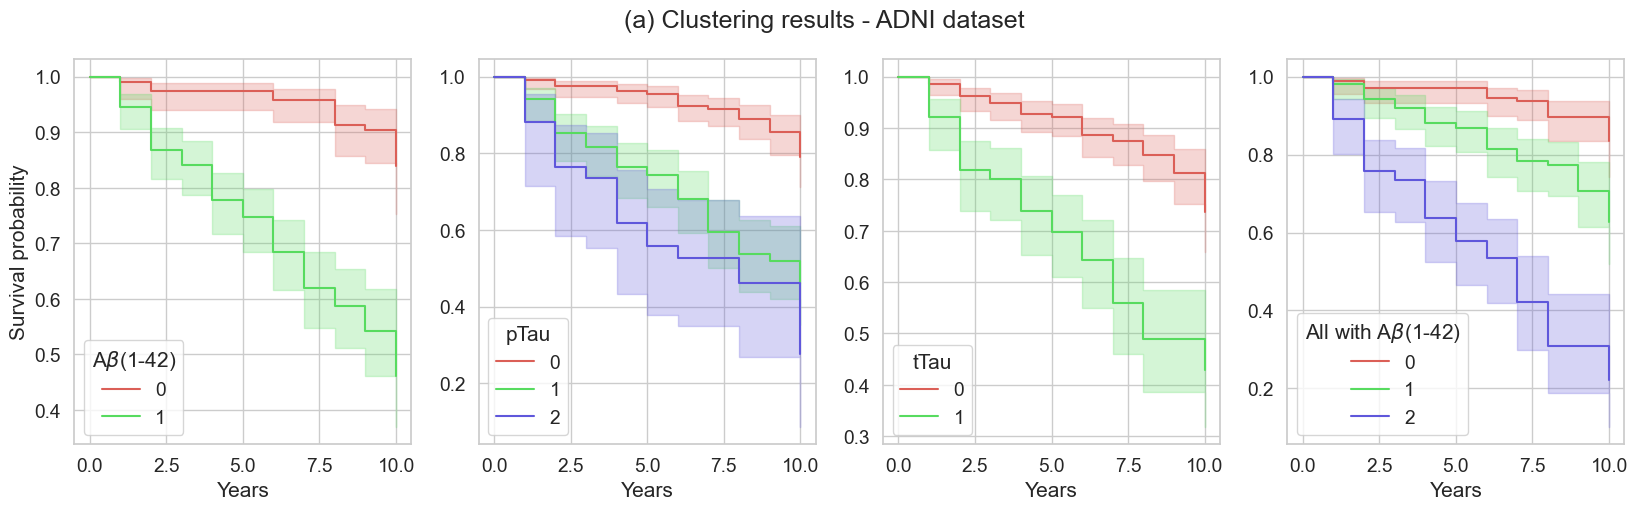

In [5]:
sns.set_palette('hls', 3)

biomarkers = {'ABETA': r'A$\beta$(1-42)', 'PTAU':'pTau', 'TAU':'tTau', 'ALL':r'All with A$\beta$(1-42)'}

i = 0
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for b in biomarkers:

    survival_file = f'data/ADNI/survival_plots/{b}_survival.csv'
    survival_data = pd.read_csv(survival_file, index_col='RID')
    survival_data.sort_values(by='scenario', inplace=True)

    kmf = KaplanMeierFitter()
    scenarios = survival_data['scenario'].unique()
    for cluster in scenarios:
        cluster_data = survival_data['scenario'] == cluster
        kmf.fit(survival_data['followup'][cluster_data],
                event_observed=survival_data['event'][cluster_data],
                label=cluster)
        kmf.plot(ax=axs[i])

    axs[i].set_xlabel('Years')
    axs[i].legend(title=biomarkers[b])

    i += 1

axs[0].set_ylabel('Survival probability')
axs[1].set_ylabel('', fontsize=1)
axs[2].set_ylabel('', fontsize=1)

plt.suptitle('(a) Clustering results - ADNI dataset')
plt.savefig(f'figures/ADNI_survival_plots.png', dpi=300, bbox_inches='tight')

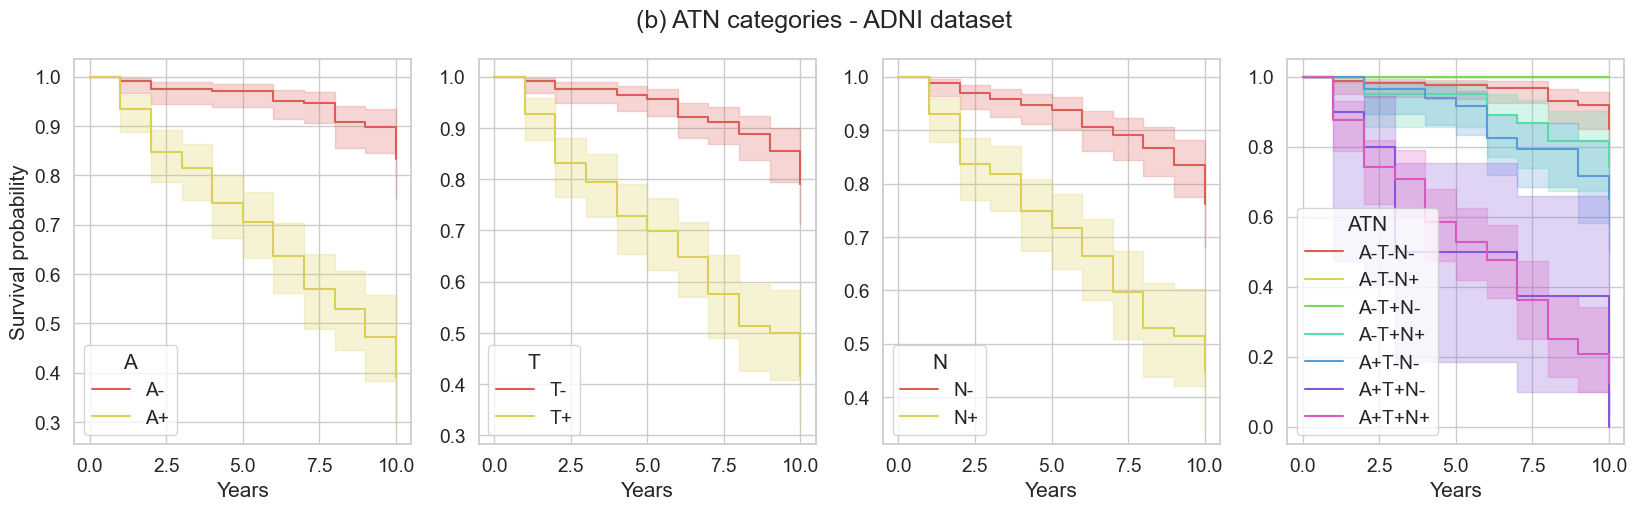

In [6]:
sns.set_palette('hls', 7)

i = 0
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for c in ['A', 'T', 'N', 'ATN']:

    survival_file = f'data/ADNI/survival_plots/{c}_survival_ATN.csv'
    survival_data = pd.read_csv(survival_file, index_col='RID')
    survival_data.sort_values(by='scenario', inplace=True, ascending=False)

    kmf = KaplanMeierFitter()
    scenarios = survival_data['scenario'].unique()
    for cluster in scenarios:
        cluster_data = survival_data['scenario'] == cluster
        kmf.fit(survival_data['followup'][cluster_data],
                event_observed=survival_data['event'][cluster_data],
                label=cluster)
        kmf.plot(ax=axs[i])

    axs[i].legend(title=c)
    axs[i].set_xlabel('Years')

    i += 1

axs[0].set_ylabel('Survival probability')
axs[1].set_ylabel('', fontsize=1)
axs[2].set_ylabel('', fontsize=1)

plt.suptitle('(b) ATN categories - ADNI dataset')
plt.savefig(f'figures/ADNI_survival_plots_ATN.png', dpi=300, bbox_inches='tight')